In [24]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

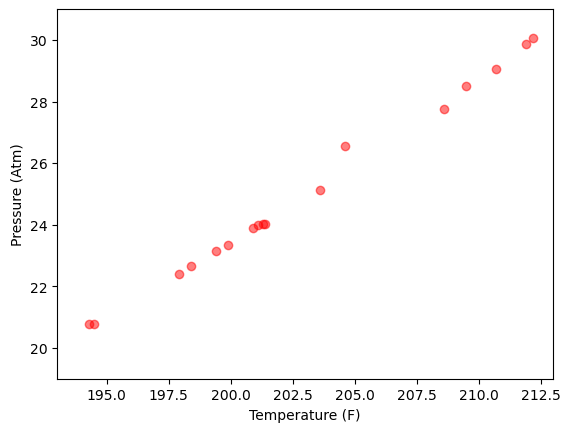

In [25]:
# Visualize the data
X_org = np.array(
    [194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9,
     212.2])
X = np.array(
    [194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9,
     212.2])
y = np.array(
    [20.79, 20.79, 22.4, 22.67, 23.15, 23.35, 23.89, 23.99, 24.02, 24.01, 25.14, 26.57, 28.49, 27.76, 29.04, 29.88,
     30.06])

plt.plot(X, y, 'ro', alpha = 0.5)
plt.xlim(193, 213)
plt.ylim(19, 31)
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

In [26]:
# Calculate mean of temp and mean of atm
X_mean = np.mean(X)
y_mean = np.mean(y)
print('Mean of Temperature:', X_mean)
print('Mean of Pressure:', y_mean)

Mean of Temperature: 202.95294117647057
Mean of Pressure: 25.058823529411764


In [27]:
# Method 1: OLS
# Calculate the sum of squared deviations from the mean
SS_xx = np.sum((X - X_mean) ** 2)
SS_xy = np.sum((X - X_mean) * (y - y_mean))
print('SXX:', SS_xx)
print('SXY:', SS_xy)

SXX: 530.7823529411756
SXY: 277.54205882352915


In [28]:
# Calculate slope and intersect of y = b + ax
slope = SS_xy / SS_xx
intercept = y_mean - slope * X_mean
print('slope:', slope)
print('intercept:', intercept)

slope: 0.5228924007846356
intercept: -81.06372712865586


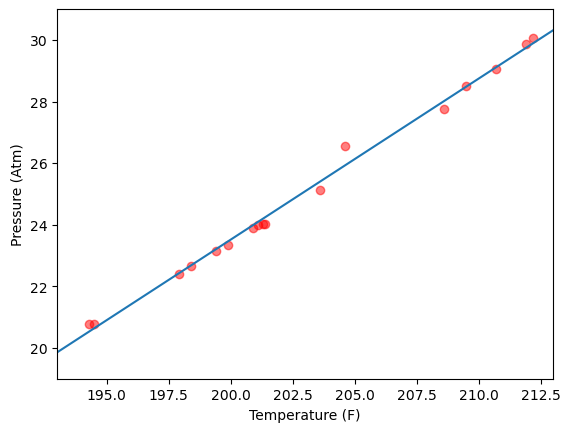

In [29]:
x0 = np.linspace(193, 213, 2)
y0 = intercept + slope * x0

plt.plot(X, y, 'ro', alpha = 0.5)  # data
plt.plot(x0, y0)  # the fitting line
plt.xlim(193, 213)
plt.ylim(19, 31)
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

w =  [-81.06372713   0.5228924 ]


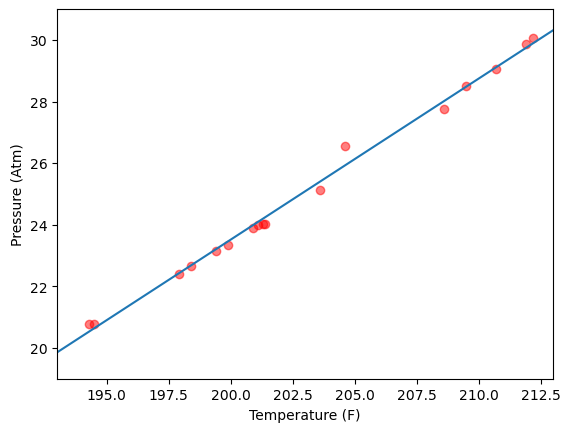

In [30]:
# Method 2: Normal equation
# Build the Xbar matrix
one = np.ones((X.shape[0], 1))
X = X.reshape(-1, 1)
Xbar = np.concatenate((one, X), axis=1)

# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

# Preparing the fitting line
w_0 = w[0]
w_1 = w[1]
x0 = np.linspace(193, 213, 2)
y0 = w_0 + w_1 * x0

# Drawing the fitting line
plt.plot(X, y, 'ro', alpha = 0.5)  # data
plt.plot(x0, y0)  # the fitting line
plt.xlim(193, 213)
plt.ylim(19, 31)
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

In [31]:
# --- R-squared, SSE, and MSE calculations ---

# Predicted values
y_pred = slope * X_org + intercept

# SSE (Sum of Squared Errors)
SSE = np.sum((y - y_pred) ** 2)

# SST (Total Sum of Squares)
SST = np.sum((y - y_mean) ** 2)

# R-squared
R_squared = 1 - (SSE / SST)

# MSE (Mean Squared Error)
MSE = SSE / len(y)

# Print the results
print(f'SSE (Sum of Squared Errors): {SSE}')
print(f'MSE (Mean Squared Error): {MSE}')
print(f'R-squared: {R_squared}')

SSE (Sum of Squared Errors): 0.8131430136424579
MSE (Mean Squared Error): 0.04783194197896811
R-squared: 0.9944281526462319
